In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd

In [4]:
# Load the customer churn dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Display concise summary of the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [9]:
# Get the count of unique values in the 'Exited' column (target variable)
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [10]:
# Get the count of unique values for each country in the 'Geography' column
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
# Get the count of unique values for each gender in the 'Gender' column
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [72]:
# Drop irrelevant columns from the DataFrame. 'RowNumber', 'CustomerId', and 'Surname' are identifiers and not useful for prediction.
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [13]:
# Display the DataFrame after dropping the specified columns
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
# Perform one-hot encoding on 'Geography' and 'Gender' columns.
# 'drop_first=True' avoids multicollinearity by dropping the first category from each.
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [26]:
# Separate features (x) and target (y).
# 'x' contains all columns except 'Exited'.
x = df.drop(columns=['Exited'])
# Apply one-hot encoding to 'Geography' and 'Gender' categorical columns in 'x'.
# 'drop_first=True' prevents multicollinearity by dropping the first category.
x = pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True)
# 'y' contains the 'Exited' column, which is the target variable.
y = df['Exited']

In [27]:
# Import train_test_split from sklearn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% train, 20% test).
# 'random_state=1' ensures reproducibility of the split.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
# Display the shape of the training features (X_train) to confirm its dimensions
X_train.shape

(8000, 11)

In [31]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it.
# This calculates mean and standard deviation from X_train and then scales X_train.
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the scaler fitted on the training data.
# It's important to use the same scaler for both training and test sets to avoid data leakage.
X_test_scaled = scaler.transform(X_test)

In [32]:
# Display the scaled training data (X_train_scaled)
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [33]:
# Import TensorFlow and Keras modules for building the neural network
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
# Initialize a sequential model (a linear stack of layers)
model = Sequential()
# Add the first hidden layer with 11 neurons, ReLU activation, and input dimension of 11 (number of features).
model.add(Dense(11,activation='relu',input_dim=11))
# Add a second hidden layer with 11 neurons and ReLU activation.
model.add(Dense(11,activation='relu'))
# Add the output layer with 1 neuron (for binary classification) and Sigmoid activation.
# Sigmoid squashes the output between 0 and 1, representing probabilities.
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Display a summary of the model's architecture, including number of layers, output shapes, and parameters
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Compile the model.
# 'loss='binary_crossentropy'' is suitable for binary classification.
# 'optimizer='Adam'' is an efficient optimization algorithm.
# 'metrics=['accuracy']' tracks the accuracy during training.
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [66]:
# Train the model using the scaled training data.
# 'epochs=100' means the model will iterate over the entire dataset 100 times.
# 'validation_split=0.2' reserves 20% of the training data for validation during training.
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6142 - loss: 0.6461 - val_accuracy: 0.7987 - val_loss: 0.4888
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8044 - loss: 0.4723 - val_accuracy: 0.8025 - val_loss: 0.4472
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8241 - loss: 0.4262 - val_accuracy: 0.8144 - val_loss: 0.4246
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8271 - loss: 0.4127 - val_accuracy: 0.8206 - val_loss: 0.4092
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8394 - loss: 0.3929 - val_accuracy: 0.8238 - val_loss: 0.3948
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8435 - loss: 0.3811 - val_accuracy: 0.8356 - val_loss: 0.3805
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8502 - loss: 0.3670 - val_accuracy: 0.8438 - val_loss: 0.3702
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.3661 - val_acc

In [59]:
# Get the weights and biases of the second layer (index 1) in the model.
# This can be useful for inspecting the learned parameters.
model.layers[1].get_weights()

[array([[ 0.92751884,  0.19488956, -0.4293733 ,  0.41596395, -0.5145708 ,
         -0.6499237 , -0.49779245, -0.53569084,  0.15315403, -0.01564941,
         -0.83740234],
        [-0.5827848 ,  0.6688912 ,  0.04152847,  0.87210244,  0.17698449,
         -0.0617326 ,  0.14920503, -0.04080314, -0.12147202, -0.06128784,
         -0.1581393 ],
        [-0.52334106, -0.4056011 , -0.34136286,  0.37990814, -0.73980397,
          0.7481736 , -0.06512762, -0.4369033 , -0.35648757,  0.98872966,
         -0.3653907 ],
        [-0.22412719,  0.79051685,  0.3662074 , -0.61316025,  0.7737439 ,
          0.06651781,  0.6105843 , -0.81599236, -0.05574279,  0.40014187,
          0.52468026],
        [-0.46095702, -0.33762437, -0.04443026,  0.3899048 ,  0.54582113,
          0.43410528,  0.05036901,  0.35014352,  0.80440086, -0.35810494,
          0.45404705],
        [ 0.19244137, -0.787424  ,  0.65858346, -0.44595137, -0.15247343,
          0.371551  ,  0.7639112 , -1.0339612 ,  0.41758123, -0.6103151

In [60]:
# Make predictions on the scaled test data.
# The output (y_log) will be probabilities (between 0 and 1) due to the sigmoid activation.
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [61]:
# Convert the predicted probabilities (y_log) into binary predictions (0 or 1).
# If probability > 0.5, predict 1 (churn), otherwise predict 0 (no churn).
y_pred = np.where(y_log>0.5,1,0)

In [62]:
# Import accuracy_score from sklearn.metrics to evaluate model performance
from sklearn.metrics import accuracy_score
# Calculate and display the accuracy score by comparing true labels (y_test) with predicted labels (y_pred).
accuracy_score(y_test,y_pred)

0.863

In [67]:
# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

In [69]:
# Access the training history, which contains metrics like loss and accuracy for each epoch
history.history

{'accuracy': [0.7284374833106995,
  0.8065624833106995,
  0.8196874856948853,
  0.8295312523841858,
  0.8345312476158142,
  0.8450000286102295,
  0.8482812643051147,
  0.8564062714576721,
  0.8589062690734863,
  0.8576562404632568,
  0.8604687452316284,
  0.8606250286102295,
  0.8620312213897705,
  0.8615624904632568,
  0.8620312213897705,
  0.8620312213897705,
  0.86328125,
  0.8623437285423279,
  0.8621875047683716,
  0.862500011920929,
  0.8621875047683716,
  0.8631250262260437,
  0.8639062643051147,
  0.8629687428474426,
  0.8635937571525574,
  0.864062488079071,
  0.862500011920929,
  0.8629687428474426,
  0.8643749952316284,
  0.8662499785423279,
  0.8621875047683716,
  0.8621875047683716,
  0.8653125166893005,
  0.8637499809265137,
  0.8643749952316284,
  0.8642187714576721,
  0.8667187690734863,
  0.8642187714576721,
  0.8659374713897705,
  0.8656250238418579,
  0.8648437261581421,
  0.864062488079071,
  0.8660937547683716,
  0.8645312786102295,
  0.8670312762260437,
  0.865156

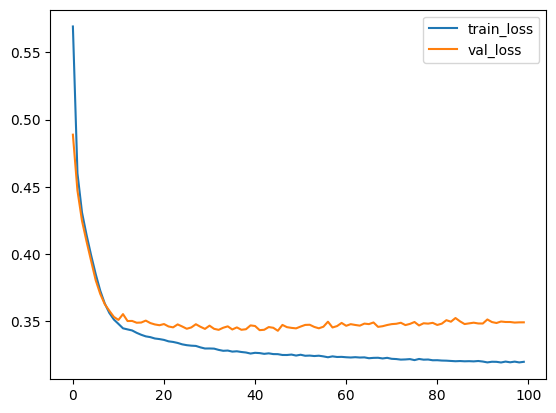

In [70]:
# Plot the training loss and validation loss over epochs.
# This helps visualize if the model is overfitting or underfitting.
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
# Add a legend to distinguish between training and validation loss
plt.legend()
# Display the plot
plt.show()

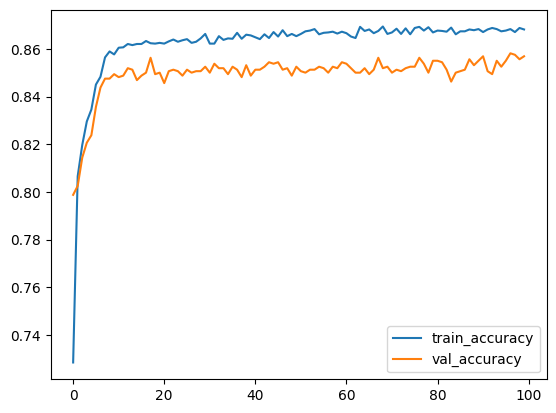

In [71]:
# Plot the training accuracy and validation accuracy over epochs.
# This helps assess the model's learning progress and generalization ability.
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
# Add a legend to distinguish between training and validation accuracy
plt.legend()
# Display the plot
plt.show()